<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>


# WEKEO TRAINING

<div style="text-align: right"><i>  </i></div>

***
<center><h1> Climate Change: Predicting the evolution of temperatures and droughts </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>

**General Note 3**: To explore more (Python and R) content, there is our [**Jupyter Catalogue**](https://notebooks.apps.mercator.dpi.wekeo.eu/), and if you seek support, there are plenty of useful resources in our [**Help Center**](https://help.wekeo.eu/en/). Feel free to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) ! <br>

***

# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. Setting up the Python environment](#2.-Setting-up-the-Python-environment)
    - [2.1 Required Python modules](#2.1-Required-Python-modules)
- [3. Data Access](#3.-Data-Access)
    - [3.1. Presentation of the product used](#3.1.-Presentation-of-the-product-used)
    - [3.2. Retrieving the data](#3.2.-Retrieving-the-data)
        - [3.2.1 HDA API](#3.2.1-HDA-API)
        - [3.2.2 Earthkit](#3.2.2-Earthkit)
- [4. Exploring the dataset](#4.-Exploring-the-dataset)
    - [4.1. First look at the data](#4.1.-First-look-at-the-data)
    - [4.2. Pre-processing and first plot](#4.2.-Pre-processing-and-first-plot)
- [5. Comparing Representative Concentration Pathways](#5.-Comparing-Representative-Concentration-Pathways)
- [6. Computing Heat and Drought Indicators](#6.-Computing-Heat-and-Drought-Indicators)
    - [6.1 Evaluating the impact of Climate Change under the RCP8.5 scenario](#6.1-Evaluating-the-impact-of-Climate-Change-under-the-RCP8.5-scenario)
    - [6.2 Assessing the impact of emissions mitigation.](#6.2-Assessing-the-impact-of-emissions-mitigation)
- [7. Conclusion](#7.-Conclusion)
- [8. Exercises](#8.-Exercises)



# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)


Climate change is reshaping environmental conditions across the globe. Driven mainly by greenhouse gas emissions from human activities—like burning fossil fuels and land-use changes—it is gradually altering temperature patterns, precipitation cycles, and the frequency of extreme weather events.

These changes are not uniform. Some areas are experiencing more frequent droughts, while others see increased rainfall or rising temperatures. Understanding how the climate might evolve under different emission scenarios is key to anticipating future risks and informing policy. Climate models, like those in the CMIP5 framework, are central to this effort, offering projections that help us explore possible climate futures.

This tutorial explores the evolution of temperature and drought conditions using simulations from the Coupled Model Intercomparison Project Phase 5 (CMIP5). CMIP5 provides a standardized set of climate model experiments used to assess the impacts of various greenhouse gas concentration trajectories.

We focus on comparing multiple CMIP5 simulations under different Representative Concentration Pathways (RCPs), specifically RCP2.6, RCP4.5, and RCP8.5. These scenarios represent low, intermediate, and high greenhouse gas emissions, respectively. By analyzing projected temperature trends and drought indicators, we aim to understand the potential climate responses to varying emission levels. The goal is to develop a clearer picture of how future climate conditions may evolve depending on global mitigation efforts.




| <img src="imgs/image_temperatures.png" width="800"> | 
|:--:| 
|  Image source :  [World Meteorological Organization](https://wmo.int/news/media-centre/european-state-of-climate-extreme-events-warmest-year-record). |




# 2. Setting up the Python environment
[Go back to the "Table of contents"](#Table-of-contents)

## 2.1 Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Here is the list of the modules we will be using in this exercise. They are pre-installed in the *wekeolab* kernel, which we recommend using.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays. |
| **xarray** | [Xarray](http://xarray.pydata.org/en/stable/) is a very user friendly library for manipulating NetCDF files within Python. It introduces labels in the form of dimensions, coordinates and attributes on top of raw NumPy-like arrays, which allows for a more intuitive, more concise, and less error-prone developer experience. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces high quality figures. |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |
|**geopandas**|[Geopandas](https://geopandas.org/en/stable/) is a library that allows spatial operations on geometric data.|
|**rioxarray**|[Rioxarray](https://corteva.github.io/rioxarray/stable/)  is a Python library that extends xarray with rasterio-based geospatial capabilities, enabling reading, writing, and georeferencing of raster data with full support for spatial metadata and coordinate reference systems.|

📌 **Note :** In this notebook, we will make use of the **EarthKit** library to retrieve data from the European Centre for Medium-Range Weather Forecasts (ECMWF), see [section 6.1](#6.1-Data-Access-using-Earthkit). We describe below a quick manipulation to perform in order to be able to use it in this notebook:
*  Open a **terminal**.
*  Activate the wekeolab environment using the following command : `conda activate wekeolab`
*  Install Earthkit : `pip install earthkit`
*  Come back to the notebook and restart the kernel.

You should now be able to import Earthkit and all the other libraries by executing the next cell. For more information on how to use Earthkit in WEkEO, please visit the [dedicated article](https://help.wekeo.eu/en/articles/10628334-exploring-wekeo-earthkit-from-data-retrieval-to-visualization).

In [1]:
# Modules system
import warnings
warnings.filterwarnings('ignore')
import getpass
import os
from pathlib import Path

# Modules related to data retrieving
from hda import Client
import json

# Modules related to plot and EO data manipulation
import numpy as np
import xarray as xr
import rioxarray
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import pandas as pd
import geopandas as gpd
import glob

# earthkit 

import earthkit.data as ekd
import earthkit.plots
from earthkit.data import settings, cache

To complete the configuration of Earthkit. A temporary cache or a custom cache directory is configured in the cell below.

In [19]:
s = {"cache-policy": "user",
     "user-cache-directory": "./cache"}
settings.set(s) 
cache.directory()

'./cache'

# 3. Data Access

[Go back to the "Table of contents"](#Table-of-contents)


## 3.1. Presentation of the product used

[Go back to the "Table of contents"](#Table-of-contents)


From the WEkEO [Data Viewer](https://www.wekeo.eu/data?view=viewer), you can explore all the products available with many filters to select the region you are interested in, the parameters you want to study, etc.

In this section, we are going to use the ["CMIP5 daily data on single levels"](https://wekeo.copernicus.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3APROJECTIONS_CMIP5_DAILY_SINGLE_LEVELS) and ["CMIP5 monthly data on single levels"](https://wekeo.copernicus.eu/data?view=dataset&dataset=EO:ECMWF:DAT:PROJECTIONS_CMIP5_MONTHLY_SINGLE_LEVELS) products. They present climate projections at a single vertical level, derived from numerous experiments, models, ensemble members, and time periods within the framework of the fifth phase of the Coupled Model Intercomparison Project (CMIP5). "Single levels" refer to variables computed at a specific vertical level, such as the surface (or near-surface) or a designated atmospheric pressure level, excluding multiple vertical levels. CMIP5 data play a crucial role in the Intergovernmental Panel on Climate Change (IPCC) Assessment Reports, including the most recent, AR5, published in 2014.

For this training, we will be using the surface temperature and precipitation flux variables.


|  |  | |
| :---: | :---| :---|
| **Product Name** | CMIP5 daily data on single levels |CMIP5 monthly data on single levels|
| **Variables used** |tas,  pr | tas |
| **Product identifier** |[EO:ECMWF:DAT:PROJECTIONS_CMIP5_DAILY_SINGLE_LEVELS](https://wekeo.copernicus.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3APROJECTIONS_CMIP5_DAILY_SINGLE_LEVELS) | [EO:ECMWF:DAT:PROJECTIONS_CMIP5_MONTHLY_SINGLE_LEVELS](https://wekeo.copernicus.eu/data?view=dataset&dataset=EO%3AECMWF%3ADAT%3APROJECTIONS_CMIP5_MONTHLY_SINGLE_LEVELS)|
|Model Used| IPSL CM5A MR| IPSL CM5A MR|
| **Temporal resolution** | Daily | Monthly |
| **Temporal coverage Historical** | 1950 - 1999 | No Historical data used |
| **Temporal coverage RCP** | 2056 - 2100 | 2006 - 2100|


<center>
    <img src="imgs/cmip5_thb.png" width="300">
</center>

You can also visit the [ECMWF](https://cds.climate.copernicus.eu/datasets/projections-cmip5-daily-single-levels?tab=overview) dedicated page to the product to see more information about the product and more detailed documentation.


## 3.2. Retrieving the data

[Go back to the "Table of contents"](#Table-of-contents)

There are many ways to [download data in WEkEO](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data). You can do it manually from the [Data Viewer](https://www.wekeo.eu/data?view=viewer), but here we will download data through Python, using the Harmonized Data Access (HDA) API provided by WEkEO. The HDA client provides a fully compliant Python3 client that can be used to search and download products using the Harmonized Data Access WEkEO API.

### 3.2.1 HDA API

[Go back to the "Table of contents"](#Table-of-contents)

In this section we show how to use the **HDA API**, which will work with most WEkEO datasets.


First you need to make sure you have a `.hdarc` saved in your root directory. Follow the method described [here](https://help.wekeo.eu/en/articles/6751608-how-to-use-the-hda-api-in-python#h_e1d774cae9). 

📌 **Note**: For the sake of convenience, you can run the following cell to generate it automatically:



In [20]:
# Modules related to data retrieving
from hda import Client
import json

from pathlib import Path

# Default location expected by hda package
hdarc = Path(Path.home() / '.hdarc')

# Create it only if it does not already exists
if not hdarc.is_file():
    import getpass
    USERNAME = input('Enter your username: ')
    PASSWORD = getpass.getpass('Enter your password: ')

    with open(Path.home() / '.hdarc', 'w') as f:
        f.write(f'user:{USERNAME}\n')
        f.write(f'password:{PASSWORD}\n')

hda_client = Client()

You are now ready to download data. We write the API request, i.e. specify which product we want, which parameters, etc. The requests we have used to download the data can be found in the `data` folder, file `data/atm/climate_req_rcp4_5_month.json`. You can read it and modify it by right clicking on the file and then selecting "Open With -> Editor".

To write a new request, the easiest way is to select your data parameters in the [WEkEO Data Explorer](https://www.wekeo.eu/data), click on [`Show API request` (HowTo)](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data#h_85849dcd7a), and copy/paste it into a file (or directly in a notebook cell).

<center>
    <img src="imgs/data_req.png" width="300">
</center>

Let's visualize our request.

In [21]:
# Loading request from json file (September S2 image)
with open('./data/climate_req_rcp4_5_month.json', 'r') as f:
    data = json.load(f)
data


{'dataset_id': 'EO:ECMWF:DAT:PROJECTIONS_CMIP5_MONTHLY_SINGLE_LEVELS',
 'experiment': 'rcp_4_5',
 'variable': ['2m_temperature'],
 'model': 'ipsl_cm5a_mr',
 'ensemble_member': 'r1i1p1',
 'period': ['200601-210012'],
 'itemsPerPage': 200,
 'startIndex': 0}

Running the next cell will launch [**the download of the data (more details)**](https://help.wekeo.eu/en/articles/6751608-how-to-use-the-hda-api-in-python#h_605d4bdc05). Depending on the product and request, it may take some time. 

📌 **Note**: After downloading the data, you may need to **unzip** it using a terminal in order to access the files.


In [22]:
### Retrieve data
## Path to local data storage
output_path = 'data'

## Run the search with query
matches = hda_client.search(data)

## Print results
print(matches)


SearchResults[items=1,volume=ND]


In [23]:
matches.download(output_path)

### 3.2.2 Earthkit

[Go back to the "Table of contents"](#Table-of-contents)


As we are working with ECMWF data in this tutorial, we can use **Earthkit** to retrieve it. Earthkit allows us to streamline the data without having to download files in our WEkEO user file system, which could quickly be saturated.

Earthkit was set up at the beginning of this tutorial, and a dedicated article is available [here](https://help.wekeo.eu/en/articles/10628334-exploring-wekeo-earthkit-from-data-retrieval-to-visualization). Earthkit takes as argument the request traditionnally used with the HDA API, in the cells below we demonstrate how to retrieve the climate simulations using the request file `data/climate_req_rcp4_5_month.json`.

📌 **Note :** To ease the data access in this tutorial, we recommend to specify only **one variable** per request.

In [24]:
with open('./data/climate_req_rcp4_5_month.json', 'r') as f:
    data = json.load(f)
    print(data)

ds_tas_rcp45_m = ekd.from_source("wekeo", 
                                 "EO:ECMWF:DAT:PROJECTIONS_CMIP5_MONTHLY_SINGLE_LEVELS",
                                  request = data)

{'dataset_id': 'EO:ECMWF:DAT:PROJECTIONS_CMIP5_MONTHLY_SINGLE_LEVELS', 'experiment': 'rcp_4_5', 'variable': ['2m_temperature'], 'model': 'ipsl_cm5a_mr', 'ensemble_member': 'r1i1p1', 'period': ['200601-210012'], 'itemsPerPage': 200, 'startIndex': 0}


The data is retrieved, let's convert it to a **xarray dataset** !

In [25]:
ds_tas_rcp45_m = ds_tas_rcp45_m.to_xarray()

# 4. Exploring the dataset

[Go back to the "Table of contents"](#Table-of-contents)


## 4.1. First look at the data

[Go back to the "Table of contents"](#Table-of-contents)

Let's explore a first climate product from the CMIP5 experiments: for instance the monthly temperature projections from the RCP4.5 scenario.

This first dataset is a simulation called AMIP (Atmospheric Model Intercomparison Project), which will serve as a fairly accurate representation of the current climate.

In [26]:
# experiment CMIP5

ds_tas_rcp45_m

<xarray.Dataset> Size: 94MB
Dimensions:    (time: 1140, bnds: 2, lat: 143, lon: 144)
Coordinates:
  * time       (time) object 9kB 2006-01-16 12:00:00 ... 2100-12-16 12:00:00
  * lat        (lat) float64 1kB -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 18kB dask.array<chunksize=(1140, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 2kB dask.array<chunksize=(143, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 2kB dask.array<chunksize=(144, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 94MB dask.array<chunksize=(1140, 143, 144), meta=np.ndarray>
Attributes: (12/28)
    institution:            IPSL (Institut Pierre Simon Laplace, Paris, France)
    institute_id:           IPSL
    experiment_id:          rcp45
    source:                 IPSL-CM5A-MR (2010) : atmos : LMDZ4 (LMDZ4_v5, 14...
    model_id:               IPSL-CM5A-MR
    forcing:                Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  IPSL-CM5A-MR model output prepared for CMIP5 RCP4.5
    parent_experiment:      historical
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.7.1

## 4.2. Pre-processing and first plot

[Go back to the "Table of contents"](#Table-of-contents)

To make the next computations easier, we will drop a few variables that may trigger errors: `lat_bnds`, `lon_bnds`, `time_bnds`. We want to use a dataset with only `lon`, `lat` and `time` dimensions. The longitudes also need to be wrapped to the [-180° ; 180°] range instead of [0°; 360°].

Then, we will convert the *time* variable to the standard *datetime* format, which is fit for Python computation.

These corrections are made in the `preproc` function defined below.

In [2]:
def preproc(ds):
    ds = ds.drop_vars(['time_bnds', 'lat_bnds', 'lon_bnds'])
    # time variable conversion
    datetimeindex = ds.indexes['time'].to_datetimeindex()
    ds['time'] = datetimeindex
    # Shift longitudes
    ds['lon'] = ((ds['lon'] + 180) % 360) - 180
    
    # Sort to keep longitudes in order
    ds = ds.sortby('lon')
    return ds


In [28]:
ds_tas_rcp45_m = preproc(ds_tas_rcp45_m)
ds_tas_rcp45_m

<xarray.Dataset> Size: 94MB
Dimensions:  (time: 1140, lat: 143, lon: 144)
Coordinates:
  * time     (time) datetime64[ns] 9kB 2006-01-16T12:00:00 ... 2100-12-16T12:...
  * lat      (lat) float64 1kB -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon      (lon) float64 1kB -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
    height   float64 8B ...
Data variables:
    tas      (time, lat, lon) float32 94MB dask.array<chunksize=(1140, 143, 144), meta=np.ndarray>
Attributes: (12/28)
    institution:            IPSL (Institut Pierre Simon Laplace, Paris, France)
    institute_id:           IPSL
    experiment_id:          rcp45
    source:                 IPSL-CM5A-MR (2010) : atmos : LMDZ4 (LMDZ4_v5, 14...
    model_id:               IPSL-CM5A-MR
    forcing:                Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA
    ...                     ...
    table_id:               Table Amon (31 January 2011) 53b766a395ac41696af4...
    title:                  IPSL-CM5A-MR model output prepared for CMIP5 RCP4.5
    parent_experiment:      historical
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.7.1

This temperature data covers the period 2006-2100 and represents the RCP4.5 scenarios, which is a carbon dioxide concentration pathway that is set to stabilize at around 660 ppm in 2100.

Let's plot the evolution of the temperature over the years to see how it evolves. To do that, we will resample the dataset to get a **yearly** timeseries, and then use a *weighted mean* over the longitudes and latitudes to compute the global mean temperature of the Earth.
The mean is weighted according to the surface area covered by each pixel : pixels near the poles cover a smaller surface that pixels near the equator, and therefore contribute less to the global temperature mean.

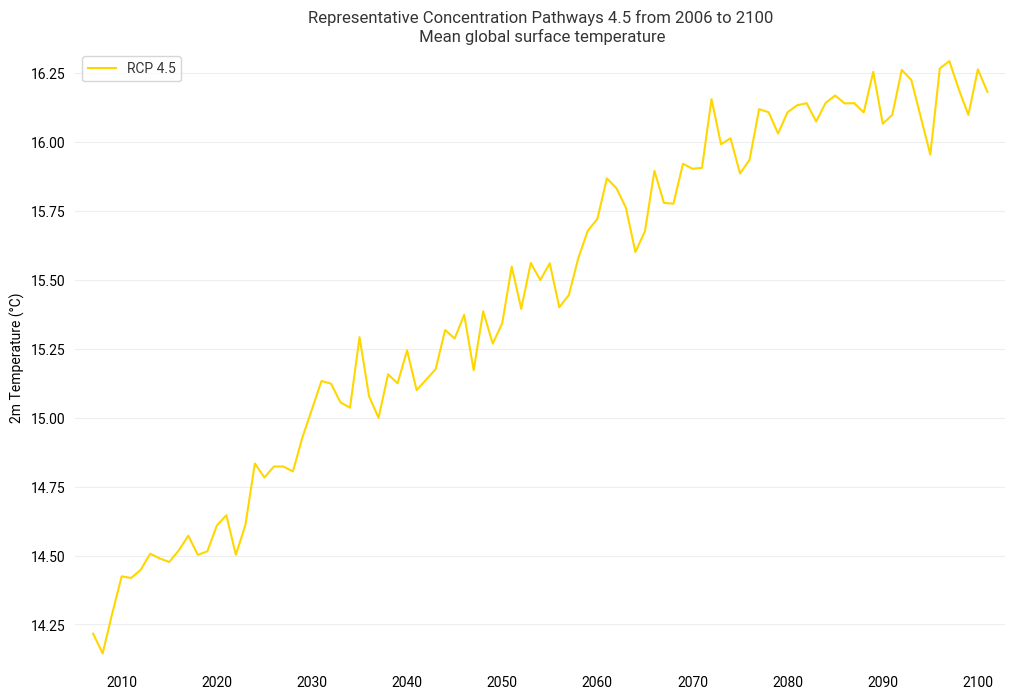

In [29]:
# resampling and weighted mean :

weights = np.cos(np.deg2rad(ds_tas_rcp45_m['lat']))
weights /= weights.sum()

ts_tas_rcp45_y = ds_tas_rcp45_m.tas.resample(time='1Y').mean().weighted(weights).mean(dim=['lon', 'lat'])

# plott
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(ts_tas_rcp45_y.time.data, ts_tas_rcp45_y - 273.15, c='gold', label='RCP 4.5')
ax.set_title("Representative Concentration Pathways 4.5 from 2006 to 2100\n Mean global surface temperature")
ax.set_ylabel('2m Temperature (°C)')
ax.legend()

# 5. Comparing Representative Concentration Pathways

[Go back to the "Table of contents"](#Table-of-contents)


Under the RCP 4.5 scenario, the global temperature clearly rises until at least 2100. Let's compare this trajectory to other scenarios :

In [30]:
ds_tas_rcp26_m = ekd.from_source("wekeo", 
                                 "EO:ECMWF:DAT:PROJECTIONS_CMIP5_MONTHLY_SINGLE_LEVELS",
                                  request = json.load(open('data/climate_req_rcp2_6_month.json')))
ds_tas_rcp26_m = preproc(ds_tas_rcp26_m.to_xarray())

ds_tas_rcp60_m = ekd.from_source("wekeo", 
                                 "EO:ECMWF:DAT:PROJECTIONS_CMIP5_MONTHLY_SINGLE_LEVELS",
                                  request = json.load(open('data/climate_req_rcp6_0_month.json')))
ds_tas_rcp60_m = preproc(ds_tas_rcp60_m.to_xarray())

ds_tas_rcp85_m = ekd.from_source("wekeo", 
                                 "EO:ECMWF:DAT:PROJECTIONS_CMIP5_MONTHLY_SINGLE_LEVELS",
                                  request = json.load(open('data/climate_req_rcp8_5_month.json')))

ds_tas_rcp85_m = preproc(ds_tas_rcp85_m.to_xarray())

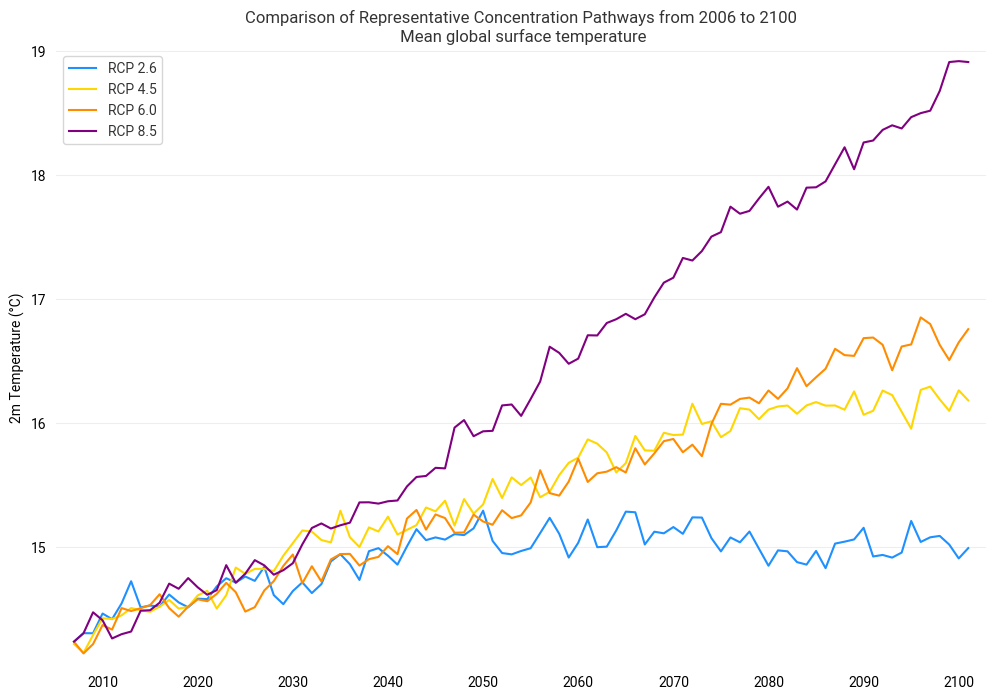

In [31]:
fig, ax = plt.subplots(figsize=(12, 8))

ts_tas_rcp26_y = ds_tas_rcp26_m.tas.resample(time='1Y').mean().weighted(weights).mean(dim=['lon', 'lat'])
ts_tas_rcp60_y = ds_tas_rcp60_m.tas.resample(time='1Y').mean().weighted(weights).mean(dim=['lon', 'lat'])
ts_tas_rcp85_y = ds_tas_rcp85_m.tas.resample(time='1Y').mean().weighted(weights).mean(dim=['lon', 'lat'])

ax.plot(ts_tas_rcp26_y.time.data, ts_tas_rcp26_y - 273.15, c='dodgerblue', label='RCP 2.6')
ax.plot(ts_tas_rcp45_y.time.data, ts_tas_rcp45_y - 273.15, c='gold', label='RCP 4.5')
ax.plot(ts_tas_rcp60_y.time.data, ts_tas_rcp60_y - 273.15, c='darkorange', label='RCP 6.0')
ax.plot(ts_tas_rcp85_y.time.data, ts_tas_rcp85_y - 273.15, c='purple', label='RCP 8.5')

ax.set_title("Comparison of Representative Concentration Pathways from 2006 to 2100\n Mean global surface temperature")
ax.set_ylabel('2m Temperature (°C)')
ax.legend()

To refine this analysis, let's filter the data to keep only the pixels located *on land*, where humans live. To do this, we can make use of the **rioxarray** library which allows us to crop xarray datasets with geospatial data. We provide a land mask : `data/masks/ne_10m_land.shp` 

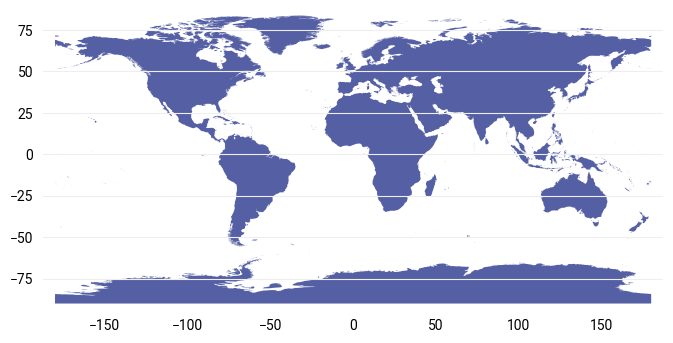

In [32]:
land = gpd.read_file('data/masks/ne_10m_land.shp')                                     # create an ax and select the projection of the map
land.plot();

In [33]:
def crop_xr_to_gdf(ds, gdf):
    ds.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
    ds.rio.write_crs("epsg:4326", inplace=True)
    ds_cropped = ds.rio.clip(gdf.geometry, gdf.crs, drop=True)
    return ds_cropped


ds_tas_rcp45_land = crop_xr_to_gdf(ds_tas_rcp45_m, land)

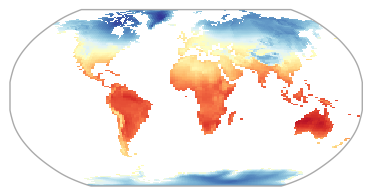

In [34]:
# quick plot to check result
date_plot= '2010-01-01'
temp_map_land = ds_tas_rcp45_land.tas.sel(time=date_plot, method='nearest').squeeze()

fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, projection=ccrs.Robinson())
im = ax1.pcolormesh(temp_map_land['lon'].data, temp_map_land['lat'].data,temp_map_land.data - 273.15,
                    cmap='RdYlBu_r', vmin=-40, vmax = 40, transform=ccrs.PlateCarree())

Wa can see that the filtering succeeded, now let's plot the temperature trends.

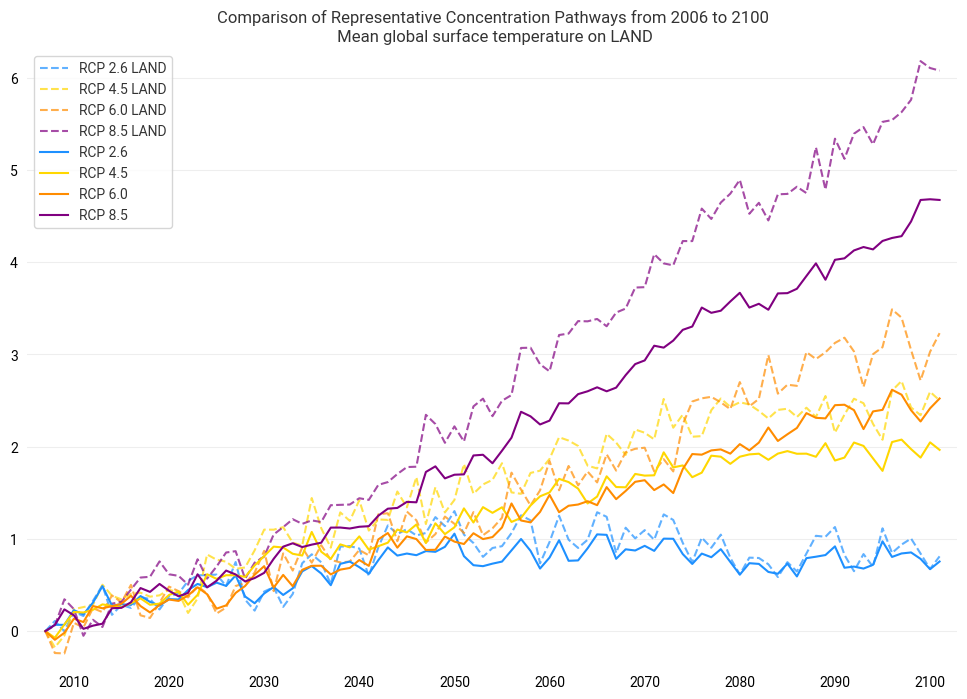

In [35]:
fig, ax = plt.subplots(figsize=(12, 8))

weights_land = np.cos(np.deg2rad(ds_tas_rcp45_land['lat']))
weights_land /= weights_land.sum()

ds_tas_rcp26_land = crop_xr_to_gdf(ds_tas_rcp26_m, land)
ds_tas_rcp60_land = crop_xr_to_gdf(ds_tas_rcp60_m, land)
ds_tas_rcp85_land = crop_xr_to_gdf(ds_tas_rcp85_m, land)

ts_tas_rcp26_y_land = ds_tas_rcp26_land.tas.resample(time='1Y').mean().weighted(weights_land).mean(dim=['lon', 'lat'])
ts_tas_rcp45_y_land = ds_tas_rcp45_land.tas.resample(time='1Y').mean().weighted(weights_land).mean(dim=['lon', 'lat'])
ts_tas_rcp60_y_land = ds_tas_rcp60_land.tas.resample(time='1Y').mean().weighted(weights_land).mean(dim=['lon', 'lat'])
ts_tas_rcp85_y_land = ds_tas_rcp85_land.tas.resample(time='1Y').mean().weighted(weights_land).mean(dim=['lon', 'lat'])

ax.plot(ts_tas_rcp26_y_land.time.data, ts_tas_rcp26_y_land - ts_tas_rcp26_y_land.data[0],
        c='dodgerblue', label='RCP 2.6 LAND', alpha=0.7, linestyle='--')
ax.plot(ts_tas_rcp45_y_land.time.data, ts_tas_rcp45_y_land - ts_tas_rcp45_y_land.data[0],
        c='gold', label='RCP 4.5 LAND', alpha=0.7, linestyle='--')
ax.plot(ts_tas_rcp60_y_land.time.data, ts_tas_rcp60_y_land - ts_tas_rcp60_y_land.data[0],
        c='darkorange', label='RCP 6.0 LAND', alpha=0.7, linestyle='--')
ax.plot(ts_tas_rcp85_y_land.time.data, ts_tas_rcp85_y_land - ts_tas_rcp85_y_land.data[0],
        c='purple', label='RCP 8.5 LAND', alpha=0.7, linestyle='--')

ax.plot(ts_tas_rcp45_y.time.data, ts_tas_rcp26_y - ts_tas_rcp26_y.data[0], c='dodgerblue', label='RCP 2.6')
ax.plot(ts_tas_rcp45_y.time.data, ts_tas_rcp45_y - ts_tas_rcp45_y.data[0], c='gold', label='RCP 4.5')
ax.plot(ts_tas_rcp45_y.time.data, ts_tas_rcp60_y - ts_tas_rcp60_y.data[0], c='darkorange', label='RCP 6.0')
ax.plot(ts_tas_rcp45_y.time.data, ts_tas_rcp85_y - ts_tas_rcp85_y.data[0], c='purple', label='RCP 8.5')

ax.set_title("Comparison of Representative Concentration Pathways from 2006 to 2100"
             + "\n Mean global surface temperature on LAND")
ax.legend()


In all scenarios, we observe that the temperature rises faster on land than on a global level, especially in high-emission scenarios like RCP 8.5. This shows the strong potential impacts of global warming on human societies.


However, these are yearly average global temperatures, which show climate trends but are not informative, for instance, when it comes to assessing actual impacts on human societies. In the following sections, we will use more refined data to compute concrete indicators of heat and drought.

# 6. Computing Heat and Drought Indicators

[Go back to the "Table of contents"](#Table-of-contents)

In this section, we are going to use **daily** temperature and precipitation data to compute yearly heat and drought indicators. We have chosen two indicators from the [European Climate Assessment & Dataset project](https://www.ecad.eu/indicesextremes/indicesdictionary.php), they are defined as follows :
*  **CDD (Consecutive Dry Days)** : Maximum number of consecutive dry days in a year.
*  **T90p (Warm Days)** : Number of days in a year where the daily temperature is above the 90th percentile of a reference period.

Our goal is to compare future projections with a reference historical climatology. The reference simulation chosen was computed using the same model as the RCP simulations, and covers the 1950-1999 period. The RCP daily simulations will cover the 2056-2100 period. 



In [36]:
# Loading request from json file 
with open('./data/climate_req_hist.json', 'r') as f:
    data = json.load(f)
data

{'dataset_id': 'EO:ECMWF:DAT:PROJECTIONS_CMIP5_DAILY_SINGLE_LEVELS',
 'experiment': 'historical',
 'variable': ['mean_precipitation_flux', '2m_temperature'],
 'model': 'ipsl_cm5a_mr',
 'ensemble_member': 'r1i1p1',
 'period': ['19500101-19991231'],
 'itemsPerPage': 200,
 'startIndex': 0}

In [37]:
# calling Earhtkit to retrieve the data
ds_hist = ekd.from_source("wekeo", 
                          "EO:ECMWF:DAT:PROJECTIONS_CMIP5_DAILY_SINGLE_LEVELS",
                          request = data)

  0%|          | 0/2 [00:00<?, ?it/s]

The data is retrieved, let's convert it to a xarray dataset and compute the indicators!

In [38]:
ds_hist = ds_hist.to_xarray()
ds_hist

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 18250, bnds: 2, lat: 143, lon: 144)
Coordinates:
  * time       (time) object 146kB 1950-01-01 12:00:00 ... 1999-12-31 12:00:00
  * lat        (lat) float64 1kB -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon        (lon) float64 1kB 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 292kB dask.array<chunksize=(18250, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 2kB dask.array<chunksize=(143, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 2kB dask.array<chunksize=(144, 2), meta=np.ndarray>
    pr         (time, lat, lon) float32 2GB dask.array<chunksize=(18250, 143, 144), meta=np.ndarray>
    tas        (time, lat, lon) float32 2GB dask.array<chunksize=(18250, 143, 144), meta=np.ndarray>
Attributes: (12/28)
    institution:            IPSL (Institut Pierre Simon Laplace, Paris, France)
    institute_id:           IPSL
    experiment_id:          historical
    source:                 IPSL-CM5A-MR (2010) : atmos : LMDZ4 (LMDZ4_v5, 14...
    model_id:               IPSL-CM5A-MR
    forcing:                Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA
    ...                     ...
    table_id:               Table day (10 February 2011) 80e409bd73611e9d25d0...
    title:                  IPSL-CM5A-MR model output prepared for CMIP5 hist...
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.7.1

The dataset has exactly the same format as the monthly ones, therefore the same pre-processing operations must be performed.

In addition, we will compute the *total daily precipitation* from the mean precipitation flux variable. This conversion simply consists in multiplying the precipitation flux (in $kg.m^{-2}.s^{-1}$, equivalent to $mm.s^{-1}$), by the number of seconds in a day (86400). This will yield the daily precipitation in $mm$.


In [39]:
ds_hist = preproc(ds_hist)
ds_hist['tp'] = ds_hist.pr*86400

ds_hist

<xarray.Dataset> Size: 6GB
Dimensions:  (time: 18250, lat: 143, lon: 144)
Coordinates:
  * time     (time) datetime64[ns] 146kB 1950-01-01T12:00:00 ... 1999-12-31T1...
  * lat      (lat) float64 1kB -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon      (lon) float64 1kB -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
    height   float64 8B ...
Data variables:
    pr       (time, lat, lon) float32 2GB dask.array<chunksize=(18250, 143, 144), meta=np.ndarray>
    tas      (time, lat, lon) float32 2GB dask.array<chunksize=(18250, 143, 144), meta=np.ndarray>
    tp       (time, lat, lon) float64 3GB dask.array<chunksize=(18250, 143, 144), meta=np.ndarray>
Attributes: (12/28)
    institution:            IPSL (Institut Pierre Simon Laplace, Paris, France)
    institute_id:           IPSL
    experiment_id:          historical
    source:                 IPSL-CM5A-MR (2010) : atmos : LMDZ4 (LMDZ4_v5, 14...
    model_id:               IPSL-CM5A-MR
    forcing:                Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA
    ...                     ...
    table_id:               Table day (10 February 2011) 80e409bd73611e9d25d0...
    title:                  IPSL-CM5A-MR model output prepared for CMIP5 hist...
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.7.1

We are now ready to compute the **CDD** indicators. We defined the dedicated functions below.

The T90p indicator is not computed for the historical dataset itself, as it measures the number of days exceeding the 90th percentile of a reference period — and the historical period serves as that reference. Instead, we will compute the 90th percentile of temperature data over the 1950–1999 period. This climatology will then be used as the baseline for calculating T90p in other RCP projections.

In [40]:
def max_consec_dry_days(arr):
    # arr: 1D boolean array
    padded = np.concatenate(([False], arr, [False]))
    diff = np.diff(padded.astype(int))
    starts = np.where(diff == 1)[0]
    ends = np.where(diff == -1)[0]
    return (ends - starts).max() if len(starts) > 0 else 0

# Consecutive Dry Days 
def compute_cdd(ds):
    tp_lt_1 = ds.tp < 1
    tp_lt_1_grouped = tp_lt_1.groupby('time.year')
    
    max_cdd = tp_lt_1_grouped.reduce(
        lambda x, axis: np.apply_along_axis(max_consec_dry_days, axis, x),
        dim='time'
        )
    
    return max_cdd

def compute_t90p(ds, ds_ref):
    tp_90p = ds.tas - 273.15 > ds_ref
    t90p = tp_90p.groupby('time.year').sum(dim="time")
    return t90p

In [41]:
# computing CDD

CDD_hist = compute_cdd(ds_hist)
CDD_hist

<xarray.DataArray 'tp' (year: 50, lat: 143, lon: 144)> Size: 8MB
dask.array<stack, shape=(50, 143, 144), dtype=int64, chunksize=(1, 143, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 1kB -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon      (lon) float64 1kB -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
    height   float64 8B ...
  * year     (year) int64 400B 1950 1951 1952 1953 1954 ... 1996 1997 1998 1999

In [43]:
# computing 90th percentile climatology
clim_tas_hist_90p = ds_hist.tas.quantile(q= 0.9, dim='time') - 273.15

In [44]:
# saving files

CDD_hist.to_netcdf('data/CDD_hist.nc')
clim_tas_hist_90p.to_netcdf('data/clim_tas_hist_90p.nc')

In [45]:
# deleting dataset variable to save space
del ds_hist

## 6.1 Evaluating the impact of Climate Change under the RCP8.5 scenario

[Go back to the "Table of contents"](#Table-of-contents)


Let's compare a projected future climatology under the "worst case scenario" RCP 8.5 to the historical period. Once again, we can retrieve data using Earthkit.

In [46]:
# retrieving the data using Earthkit

# Loading request from json file 
with open('./data/climate_req_rcp8_5_tas.json', 'r') as f:
    data = json.load(f)
print(data)

ds_tas_rcp85 = ekd.from_source("wekeo",
                               "EO:ECMWF:DAT:PROJECTIONS_CMIP5_DAILY_SINGLE_LEVELS",
                               request=data)

{'dataset_id': 'EO:ECMWF:DAT:PROJECTIONS_CMIP5_DAILY_SINGLE_LEVELS', 'experiment': 'rcp_8_5', 'variable': ['2m_temperature'], 'model': 'ipsl_cm5a_mr', 'ensemble_member': 'r1i1p1', 'period': ['20560101-21001231'], 'itemsPerPage': 200, 'startIndex': 0}


  0%|          | 0/1 [00:00<?, ?it/s]

In [47]:
ds_tas_rcp85 = preproc(ds_tas_rcp85.to_xarray())
ds_tas_rcp85

<xarray.Dataset> Size: 1GB
Dimensions:  (time: 16425, lat: 143, lon: 144)
Coordinates:
  * time     (time) datetime64[ns] 131kB 2056-01-01T12:00:00 ... 2100-12-31T1...
  * lat      (lat) float64 1kB -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon      (lon) float64 1kB -180.0 -177.5 -175.0 -172.5 ... 172.5 175.0 177.5
    height   float64 8B ...
Data variables:
    tas      (time, lat, lon) float32 1GB dask.array<chunksize=(16425, 143, 144), meta=np.ndarray>
Attributes: (12/28)
    institution:            IPSL (Institut Pierre Simon Laplace, Paris, France)
    institute_id:           IPSL
    experiment_id:          rcp85
    source:                 IPSL-CM5A-MR (2010) : atmos : LMDZ4 (LMDZ4_v5, 14...
    model_id:               IPSL-CM5A-MR
    forcing:                Nat,Ant,GHG,SA,Oz,LU,SS,Ds,BC,MD,OC,AA
    ...                     ...
    table_id:               Table day (10 February 2011) 80e409bd73611e9d25d0...
    title:                  IPSL-CM5A-MR model output prepared for CMIP5 RCP8.5
    parent_experiment:      historical
    modeling_realm:         atmos
    realization:            1
    cmor_version:           2.7.1

In [48]:
# computing T90p indicator

ds_t90p_rcp85 = compute_t90p(ds_tas_rcp85, clim_tas_hist_90p)
ds_t90p_rcp85

<xarray.DataArray 'tas' (year: 45, lat: 143, lon: 144)> Size: 7MB
dask.array<stack, shape=(45, 143, 144), dtype=int64, chunksize=(1, 143, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 1kB -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon       (lon) float64 1kB -180.0 -177.5 -175.0 ... 172.5 175.0 177.5
    height    float64 8B ...
    quantile  float64 8B 0.9
  * year      (year) int64 360B 2056 2057 2058 2059 2060 ... 2097 2098 2099 2100

Let's now compute the CDD indicator for the RCP8.5 projections and compare them to the Historical data !

In [49]:
del ds_tas_rcp85

In [55]:
# retrieving the precipitation data using Earthkit

# Loading request from json file 
with open('./data/climate_req_rcp8_5_pr.json', 'r') as f:
    data = json.load(f)
print(data)

ds_pr_rcp85 = ekd.from_source("wekeo",
                              "EO:ECMWF:DAT:PROJECTIONS_CMIP5_DAILY_SINGLE_LEVELS",
                              request = data)

{'dataset_id': 'EO:ECMWF:DAT:PROJECTIONS_CMIP5_DAILY_SINGLE_LEVELS', 'experiment': 'rcp_8_5', 'variable': ['mean_precipitation_flux'], 'model': 'ipsl_cm5a_mr', 'ensemble_member': 'r1i1p1', 'period': ['20560101-21001231'], 'itemsPerPage': 200, 'startIndex': 0}


  0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
ds_pr_rcp85 = preproc(ds_pr_rcp85.to_xarray())
ds_pr_rcp85['tp'] = ds_pr_rcp85.pr*86400

CDD_rcp85 = compute_cdd(ds_pr_rcp85)

In [57]:
# saving the files 

CDD_rcp85.to_netcdf('data/CDD_rcp85.nc')
ds_t90p_rcp85.to_netcdf('data/ds_t90p_rcp85.nc')

In [58]:
del ds_pr_rcp85

All of the data we needed has been processed and is now ready for plotting !

In [3]:
# Execute only if needed : reload the processed data.

# CDD_rcp85 = xr.open_dataset('data/CDD_rcp85.nc').tp
# CDD_hist = xr.open_dataset('data/CDD_hist.nc').tp

# ds_t90p_rcp85 = xr.open_dataset('data/ds_t90p_rcp85.nc').tas
# clim_tas_hist_90p = xr.open_dataset('data/clim_tas_hist_90p.nc').tas

In [4]:
# map plot setup
def setup_map(ax):
    ax.coastlines(color='k')                                                                    # add the coastlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)                        # add the longitude / latitude lines
    gl.right_labels = False                                                            # remove latitude labels on the right
    gl.top_labels = False  

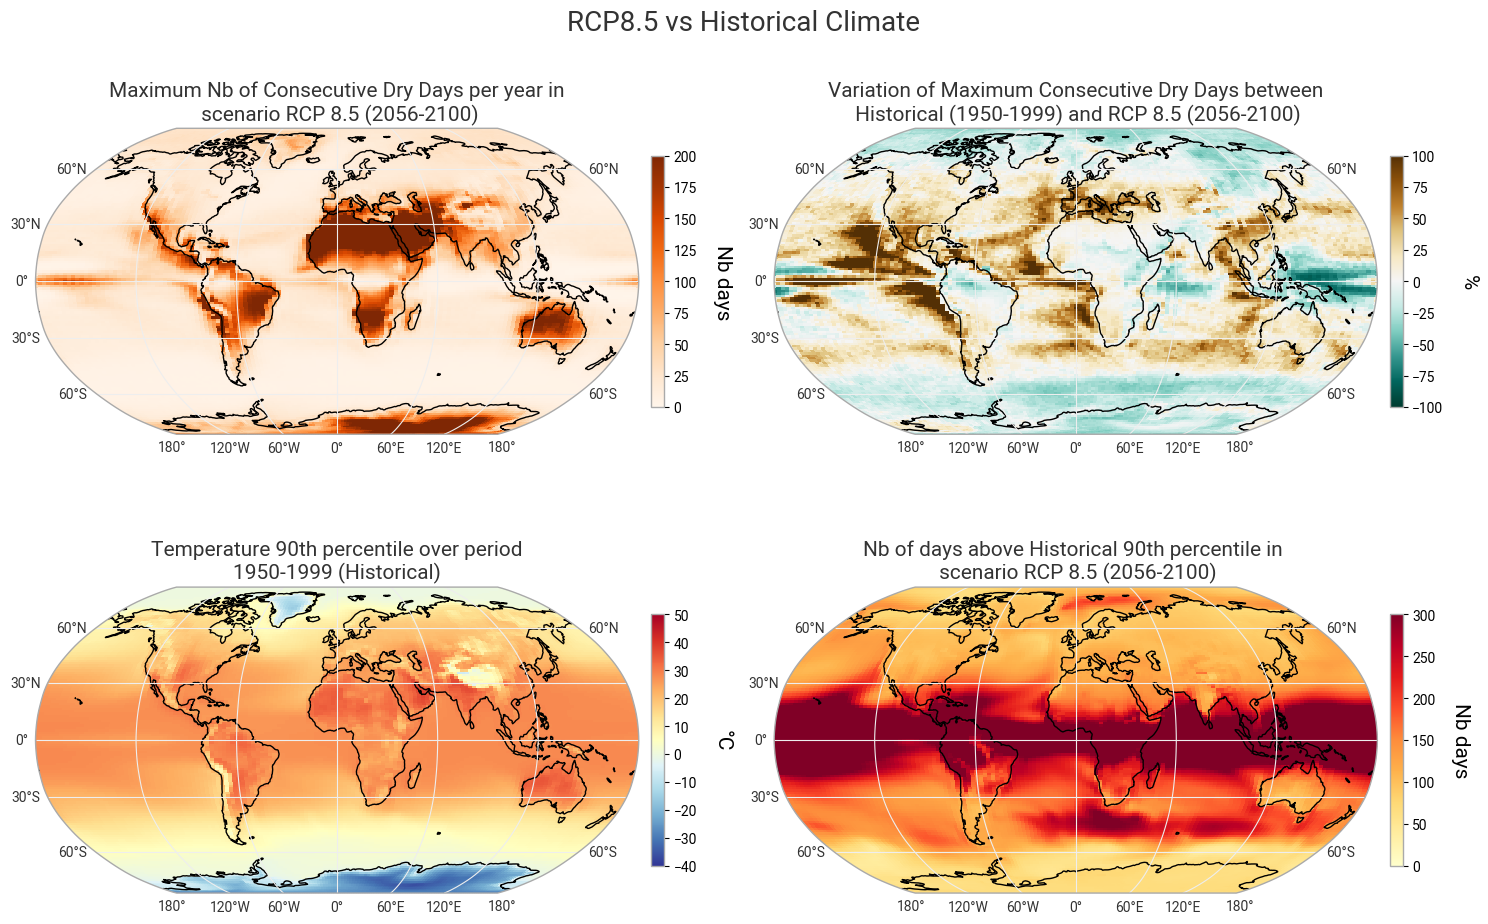

In [5]:
# climatologies :
CDD_rcp85_clim = CDD_rcp85.mean(dim='year')
CDD_hist_clim = CDD_hist.mean(dim='year')
t90p_rcp85_clim = ds_t90p_rcp85.mean(dim='year')

fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot(221, projection=ccrs.Robinson())
setup_map(ax1)
im = ax1.pcolormesh(CDD_rcp85_clim.lon.data, CDD_rcp85_clim.lat.data,
                    CDD_rcp85_clim, cmap='Oranges', transform=ccrs.PlateCarree(), vmin=0, vmax=200)
cbar = fig.colorbar(im, ax=ax1, fraction=0.02, pad=0.02)                          # add the colorbar
cbar.set_label('Nb days', rotation=270, fontsize=15, labelpad=25)
ax1.set_title('Maximum Nb of Consecutive Dry Days per year in\n scenario RCP 8.5 (2056-2100)',fontsize=15)


ax2 = plt.subplot(222, projection=ccrs.Robinson())
setup_map(ax2)
im = ax2.pcolormesh(CDD_rcp85_clim.lon.data, CDD_rcp85_clim.lat.data,
                    100*(CDD_rcp85_clim - CDD_hist_clim)/CDD_hist_clim, cmap='BrBG_r',
                    transform=ccrs.PlateCarree(), vmin=-100, vmax=100)
cbar = fig.colorbar(im, ax=ax2, fraction=0.02, pad=0.02)                          # add the colorbar
cbar.set_label('%', rotation=270, fontsize=15, labelpad=25)
ax2.set_title('Variation of Maximum Consecutive Dry Days between'
              + '\n Historical (1950-1999) and RCP 8.5 (2056-2100)', fontsize=15)


ax3 = plt.subplot(223, projection=ccrs.Robinson())
setup_map(ax3)
im = ax3.pcolormesh(clim_tas_hist_90p['lon'].data, clim_tas_hist_90p['lat'].data,
                    clim_tas_hist_90p.data, cmap='RdYlBu_r',vmin=-40, vmax=50, transform=ccrs.PlateCarree())
cbar = fig.colorbar(im, ax=ax3, fraction=0.02, pad=0.02)                          # add the colorbar
cbar.set_label('°C', rotation=270, fontsize=15, labelpad=25)
ax3.set_title('Temperature 90th percentile over period\n1950-1999 (Historical)', fontsize=15)

ax4 = plt.subplot(224, projection=ccrs.Robinson())
setup_map(ax4)
im = ax4.pcolormesh(t90p_rcp85_clim['lon'].data, t90p_rcp85_clim['lat'].data,
                    t90p_rcp85_clim.data, cmap='YlOrRd', transform=ccrs.PlateCarree(), vmin=0, vmax=300)
cbar = fig.colorbar(im, ax=ax4, fraction=0.02, pad=0.02)                          # add the colorbar
cbar.set_label('Nb days', rotation=270, fontsize=15, labelpad=25)
ax4.set_title('Nb of days above Historical 90th percentile in \n scenario RCP 8.5 (2056-2100)', fontsize=15)

plt.suptitle('RCP8.5 vs Historical Climate', fontsize=20)
plt.tight_layout()

Concerning the droughts, we observe that under the RCP 8.5 scenario, the variations of the CDD indicator with regard to the historical climatology are not homogeneously distributed around the globe. For instance we clearly observe an increase in drought durations around the Mediterranean Sea, Central America, South-East Asia or Australia, but also a decrease near the poles or in Papua New Guinea.

As for temperatures, we observe that the frequency of very hot days is expected to increase all over the globe, and especially near the equator.

This analysis was performed on the RCP8.5, which is the "worst case" scenario. In the next section we will compute the same indicators in a "mitigated emissions" scenarios : RCP 2.6.

## 6.2 Assessing the impact of emissions mitigation

[Go back to the "Table of contents"](#Table-of-contents)


We have pre-saved the CDD and T90p indicators for the RCP 2.6 simulations. Note that you can process the data yourself by using Earthkit and the request files from the `data/`directory.

In [6]:
# pre_loading cell
clim_tas_hist_90p = xr.open_dataset('data/clim_tas_hist_90p.nc').tas
ds_t90p_rcp85 = xr.open_dataset('data/ds_t90p_rcp85.nc').tas
ds_t90p_rcp26 = xr.open_dataset('data/ds_t90p_rcp26.nc').tas
CDD_rcp85 = xr.open_dataset('data/CDD_rcp85.nc').tp
CDD_rcp26 = xr.open_dataset('data/CDD_rcp26.nc').tp
CDD_hist = xr.open_dataset('data/CDD_hist.nc').tp

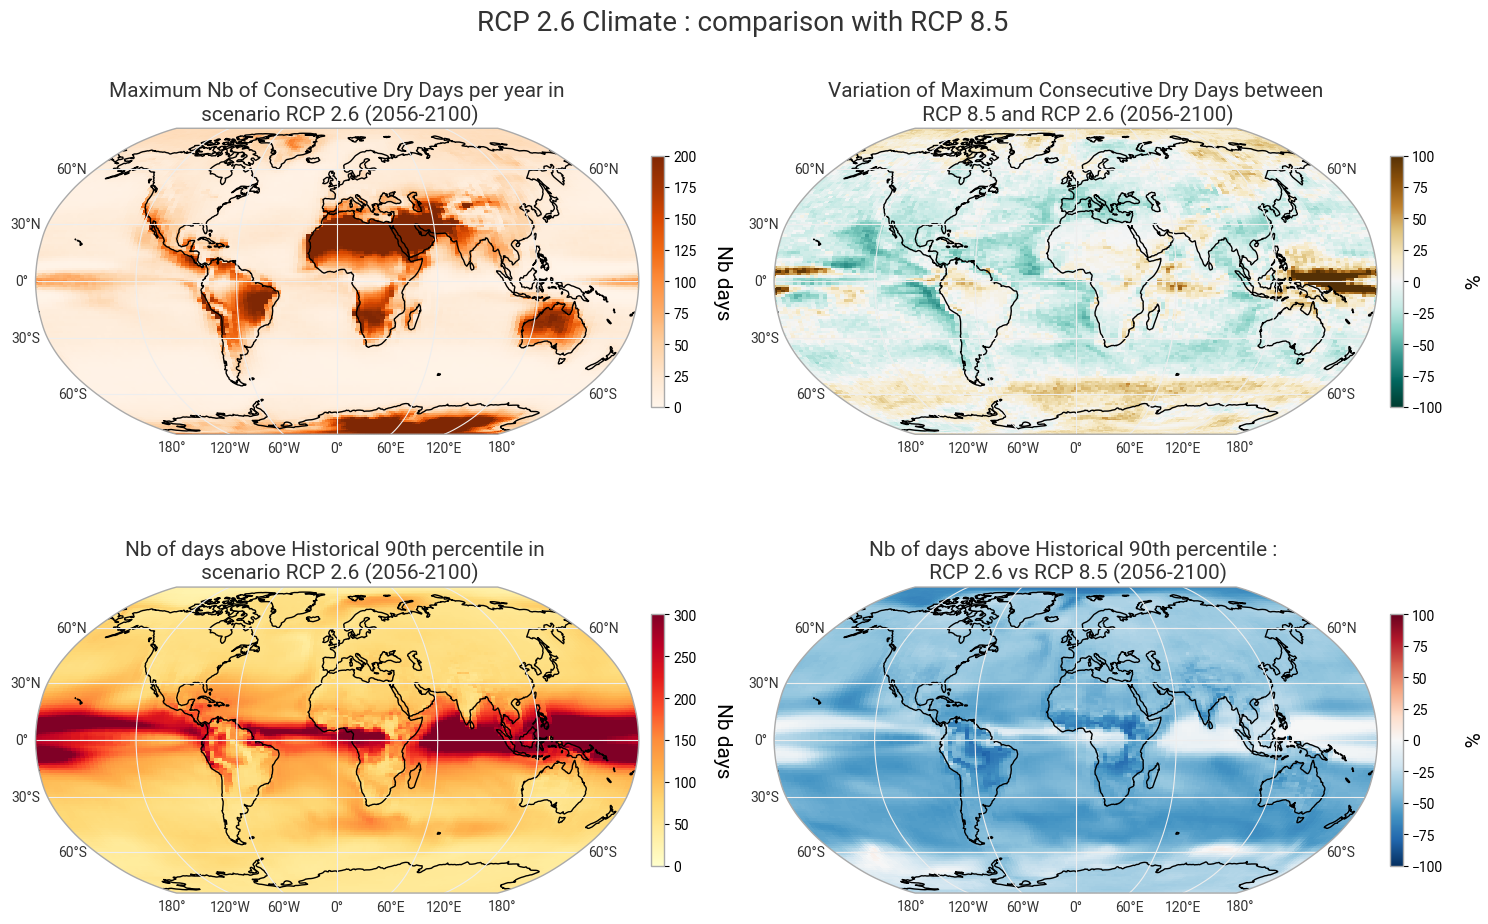

In [7]:
t90p_rcp26_clim = ds_t90p_rcp26.mean(dim='year')
t90p_rcp85_clim = ds_t90p_rcp85.mean(dim='year')
CDD_rcp26_clim = CDD_rcp26.mean(dim='year')
CDD_rcp85_clim = CDD_rcp85.mean(dim='year')

fig = plt.figure(figsize=(15, 10))

ax1= plt.subplot(221, projection=ccrs.Robinson())
setup_map(ax1)
im = ax1.pcolormesh(CDD_rcp26_clim.lon.data, CDD_rcp26_clim.lat.data,
                    CDD_rcp26_clim, cmap='Oranges', transform=ccrs.PlateCarree(), vmin=0, vmax=200)
cbar = fig.colorbar(im, ax=ax1, fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('Nb days', rotation=270, fontsize=15, labelpad=25)
ax1.set_title('Maximum Nb of Consecutive Dry Days per year in\n scenario RCP 2.6 (2056-2100)', fontsize=15)

ax2= plt.subplot(222, projection=ccrs.Robinson())
setup_map(ax2)
im = ax2.pcolormesh(CDD_rcp26_clim.lon.data, CDD_rcp26_clim.lat.data,
                    100*(CDD_rcp26_clim - CDD_rcp85_clim)/CDD_rcp85_clim, cmap='BrBG_r',
                    transform=ccrs.PlateCarree(), vmin=-100, vmax=100)
cbar = fig.colorbar(im, ax=ax2, fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('%', rotation=270, fontsize=15, labelpad=25)
ax2.set_title('Variation of Maximum Consecutive Dry Days between\n RCP 8.5 and RCP 2.6 (2056-2100)', fontsize=15)


ax3= plt.subplot(223, projection=ccrs.Robinson())
setup_map(ax3)
im = ax3.pcolormesh(t90p_rcp26_clim['lon'].data, t90p_rcp26_clim['lat'].data,
                    t90p_rcp26_clim.data, cmap='YlOrRd', transform=ccrs.PlateCarree(), vmin=0, vmax=300)
cbar = fig.colorbar(im, ax=ax3, fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('Nb days', rotation=270, fontsize=15, labelpad=25)
ax3.set_title('Nb of days above Historical 90th percentile in \n scenario RCP 2.6 (2056-2100)', fontsize=15)

ax4 = plt.subplot(224, projection=ccrs.Robinson())
setup_map(ax4)
im = ax4.pcolormesh(t90p_rcp26_clim['lon'].data, t90p_rcp26_clim['lat'].data,
                    100*(t90p_rcp26_clim.data - t90p_rcp85_clim)/t90p_rcp85_clim, cmap='RdBu_r',
                    transform=ccrs.PlateCarree(), vmin=-100, vmax=100)
cbar = fig.colorbar(im, ax=ax4, fraction=0.02, pad=0.02)                                            # add the colorbar
cbar.set_label('%', rotation=270, fontsize=15, labelpad=25)
ax4.set_title('Nb of days above Historical 90th percentile : \n RCP 2.6 vs RCP 8.5 (2056-2100)', fontsize=15)

plt.suptitle('RCP 2.6 Climate : comparison with RCP 8.5', fontsize=20)
plt.tight_layout()

For droughts, we observe that the areas previously identified as significantly drier under the RCP 8.5 scenario show shorter dry periods on average under the RCP2.6 scenario. the duration of droughts decreases by more than 25% in a mitigated climate in the Mediterannean region of in Central America for instance.

Finally we can observe that very hot days are far less frequent in the RCP2.6 climate than in the RCP 8.5 climate.

This shows that the impacts of climate change can vary a lot depending on the magnitude of future carbon emissions, and therefore depending on the efforts made to mitigate them.

# 7. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)

In this notebook, we explore several climate change scenarios based on different potential trajectories of carbon emissions. For each scenario, we assess the possible consequences for human societies by computing specific indicators related to heat and drought. The climate simulations clearly show that the level of carbon emissions mitigation plays a critical role in shaping future climate conditions, with significant differences in projected heat and drought impacts depending on the chosen pathway.



# 8. Exercises

[Go back to the "Table of contents"](#Table-of-contents)

Here is a set of exercises we propose for you to go further into the analysis. There are 2 levels depending on how much Python code you need to write to answer the questions.


**Beginner**:

* Ocean warming: Oceans are warming too. Can you perform a similar analysis to that in [Section 5](#5.-Comparing-Representative-Concentration-Pathways) and estimate the rate at which the average ocean temperature is rising? Use the `ne_10m_ocean.shp` shapefile available in the data directory.

* Scenario comparison: In [Section 6](#6.-Comparison-with-future-climate-projections), we compared RCP 8.5 with the historical climate. Modify the data request to repeat the analysis for other scenarios, such as RCP 4.5 or RCP 6.0.

**Intermediate**:

* Extreme climate indicators: In [Section 6](#6.-Comparison-with-future-climate-projections), we defined two yearly indicators based on temperature and precipitation. Refer to the [European Climate Assessment & Dataset project](https://www.ecad.eu/indicesextremes/indicesdictionary.php) (ECA&D) project webpage to find other indicators for extreme climate events based on the same variables. Try computing these to extend your analysis.

* Other climate variables: The ECA&D also includes indicators for other variables (e.g., wind, humidity). Using the same experiments, retrieve the corresponding variables with Earthkit and compute additional indicators to broaden your assessment.



<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>
  
--- 

##### **And thank you for your attention! :)** 
    
    
We hope you enjoyed this Jupyter Notebook training.

You now have plenty of tools to study climate change. Feel free to re-use and adapt all the Python scripts of this notebook to your needs! 

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). If you have any question, do not hesitate to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) !


# Additional Information
---

#### Compatible Data Science Toolkits

In [74]:
import pkg_resources; pkg_resources.get_distribution("hda").version

'2.18'

In [75]:
import xarray; print(xarray.__version__)

2024.9.0


#### Last Modified and Tested

In [76]:
from datetime import date; print(date.today())

2024-11-19


<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>